In [6]:
# import mpld3
# mpld3.enable_notebook()
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib inline
sns.set()

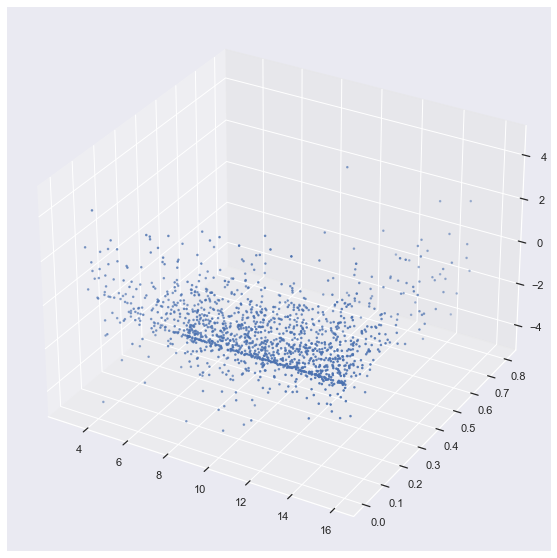

In [7]:
path = "data/contrails1/0.2.csv"

df = pd.read_csv(path)

icedf = df[df.iceLabel == 1]

clusterdf = icedf[['Points:0', 'Points:1', 'Points:2']]

data = clusterdf[["Points:0","Points:1","Points:2"]].to_numpy()

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], s=2.5)
# ax.view_init(azim=200)
plt.show()

In [ ]:
neigh = NearestNeighbors(n_neighbors=6)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
# print(distances)
plt.plot(distances)

In [ ]:
m = DBSCAN(eps=0.1, min_samples=6)
m.fit(data)

In [ ]:
clusters = m.labels_
print("number of cluster found: {}".format(len(set(m.labels_))))
print('cluster for each point: ', m.labels_)

In [ ]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], c=vectorizer(clusters), s=25)
# ax.view_init(0)
plt.show()